<a href="https://colab.research.google.com/github/jolurf/Coursera/blob/main/sinais_unicamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Em intervalos de tempo fixo faz a conversão da corrente contínua para bits, essa é a amostragem.<br>


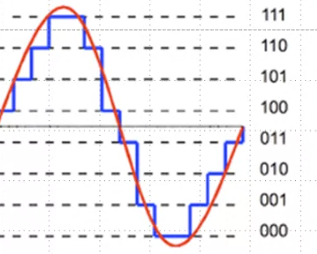

Em imagem, cada pixel de 0 a 255, que são 8 bits. Sendo que cada bit pode ser 0 ou 1

In [1]:
import numpy as np

In [2]:
amostragem = 48000
freq = 6000
xs = np.linspace(0,1,amostragem)
ys = np.cos(2*np.pi*xs*freq)
conversion = {"-0.8":"10","-0.3":"00","0.2":"01","0.7":"11"}

In [3]:
def convert(y,conversion):
    dif = np.array([np.abs(y - float(x)) for x in conversion.keys()])
    return list(conversion.values())[np.argmin(dif)]

string = ""
for y in ys[:5]:
  string += convert(y,conversion)
  print(y)
  print(conversion)

1.0
{'-0.8': '10', '-0.3': '00', '0.2': '01', '0.7': '11'}
0.7070952108431889
{'-0.8': '10', '-0.3': '00', '0.2': '01', '0.7': '11'}
-3.272560525223005e-05
{'-0.8': '10', '-0.3': '00', '0.2': '01', '0.7': '11'}
-0.7071414910806807
{'-0.8': '10', '-0.3': '00', '0.2': '01', '0.7': '11'}
-0.9999999978580695
{'-0.8': '10', '-0.3': '00', '0.2': '01', '0.7': '11'}


In [4]:
string

'1111011010'

Aliasing

Codenome - exemplo na corrida de fórmula 1 que parece que a roda está parada<br>
estroboscopic effect<br>
iPhone inside guitar
Amazing water and sound illusion

# Amplitude e fase


Sinal senoidal é dado por $Acos(2\pi \omega t + \theta)$.
A é a amplitude.<br>
$\omega$ é a frequência <br>
$\theta$ é a fase<br>


## Crie seu próprio áudio

In [5]:
from scipy.io.wavfile import write
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
def senoide(f,t,a,theta=0):
  return a*np.cos(2*np.pi*f*t+theta)

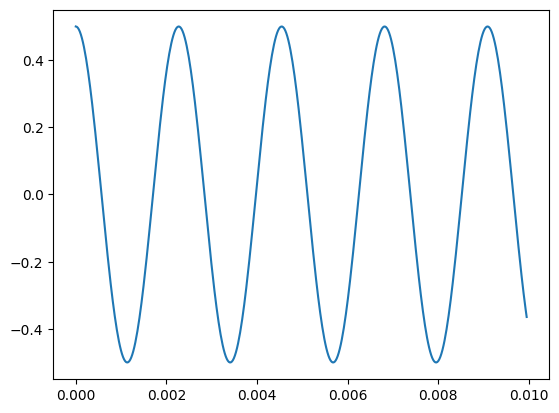

In [6]:
duration = 1.0  # duração em segundos
frequency = 440  # frequência da senoide em Hz (A4)
sampling_rate = 44100  # taxa de amostragem em Hz (qualidade do áudio)

# Cria o sinal da senoide
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
sine_wave = senoide(frequency,t,0.5)#+ senoide(frequency/2,t,0.5)+ senoide(frequency*2,t,0.5)  # amplitude entre -0.5 e 0.5 para evitar distorção

# Salva como um arquivo .wav
output_file = "/content/sine_wave.wav"
write(output_file, sampling_rate, (sine_wave * 32767).astype(np.int16))

# Toca o áudio no Colab
Audio(output_file)

plt.plot(t[:frequency],sine_wave[:frequency])

Representação RGB

Question 1
O olho humano funciona mais ou menos de acordo com a transformada de Fourier, e esse exercício, um pouco mais longo, discutirá como isso ocorre. E já prepararemos para o próximo tópico, em que veremos como alguns sistemas respondem a entradas senoidais.

Em primeiro lugar, as cores também possuem sua transformada de Fourier. As cores que são compostas por apenas uma frequência são aquelas que vemos no arco-íris, que nada mais é do que a decomposição da luz do sol em suas frequências. Ou seja, a luz do sol é a soma das cores do arco-íris.

A figura abaixo, retirada de commons.wikimedia.org/wiki/File:Srgbspectrum.png, mostra as cores com uma frequência só (chamadas de monocromáticas) e suas correspondentes frequências. Todas as outras cores são combinações dessas frequências, como ocorre na transformada de Fourier:
A figura abaixo, retirada de commons.wikimedia.org/wiki/File:Srgbspectrum.png, mostra as cores com uma frequência só (chamadas de monocromáticas) e suas correspondentes frequências. Todas as outras cores são combinações dessas frequências, como ocorre na transformada de Fourier:


No fundo de nosso olho, nós temos quatro tipos de células: três tipos de cones, que respondem às cores azul, verde e vermelho, e os bastonetes, que reagem mais à intensidade de luz do que à cor propriamente dita. Essas células respondem às frequências de luz visível de acordo com o gráfico abaixo, retirado de http://commons.wikimedia.org/wiki/File:Cone-response.png. Nesse gráfico, R corresponde aos bastonetes, e R, G, e B correspondem aos cones das cores vermelho, verde e azul.

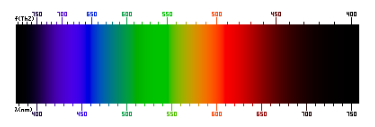

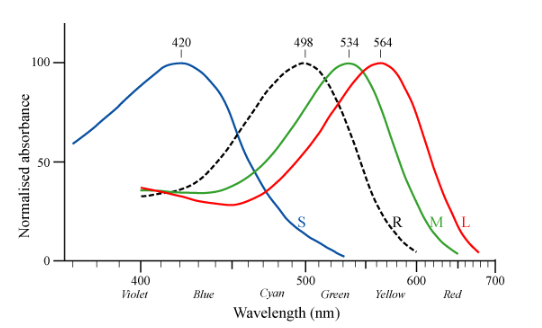

Notas importantes:

Esses gráficos estão mostrados em comprimento de onda, notação mais usada em óptica. O comprimento de onda λ está relacionado à frequência f de acordo com
f=c/λ, em que
c
=
10^8 m/s é a velocidade da luz no vácuo. O gráfico que mostra o espectro visível acima traz o valor tanto da frequência quanto do comprimento de onda correspondente.

Os cones respondem com uma determinada intensidade a uma determinada frequência. No próximo vídeo veremos que, diferentes dos cones, muitos sistemas na realidade colocam em sua saída um sinal com a mesma frequência presente na entrada, mas com uma outra amplitude e fase.

Temos, assim, a razão para as cores serem especificadas em seus níveis de azul, verde e vermelho. Cada um desses valores excita um cone, e dependendo da intensidade com que cada cone é excitado, eu tenho a percepção de uma cor.

Finalmente, chegamos à pergunta. Considere a cor amarela, cujo comprimento de onda é cerca de 550 nm. Qual o valor de azul, verde e vermelho dessa cor, lembrando que esses valores vão de 0 a 255?

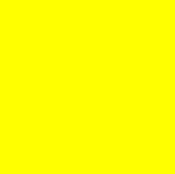

In [7]:
import matplotlib.pyplot as plt

def plot_rgb_color(rgb):
    # Normaliza os valores RGB para o intervalo [0, 1]
    rgb_normalized = [x / 255.0 for x in rgb]

    # Cria a figura e define o tamanho
    fig, ax = plt.subplots(figsize=(2, 2))
    fig.patch.set_facecolor(rgb_normalized)  # Define a cor de fundo da figura

    # Remove os eixos e margens
    ax.axis("off")

    plt.show()

# Exemplo de uso
rgb = [255, 255,0]  # vermelho puro
plot_rgb_color(rgb)


Note que o amarelo ocorre quando a absorbância do azul é 0 e do verde/ vermelho são médias/altas

## Transformada de Fourier

Note que, $\forall  k \in \mathbb{N}, sen(kx),cos(kx), x \in [-\pi,\pi] $ formam uma base ortogonal do espaço das funções com métrica uniforme.

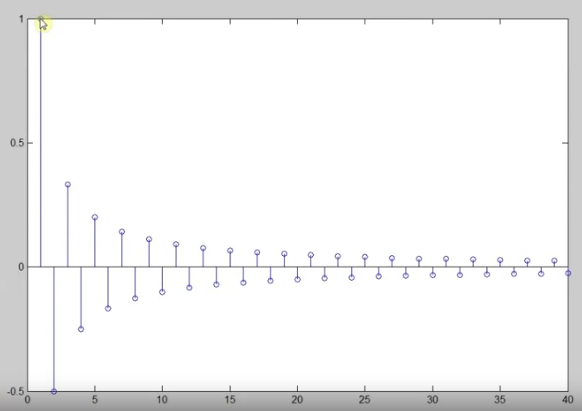

Espectro de frequência acima diz com que amplitude aquela frequência entrou

Seja f(x) uma função dada no intervalo [-L,L], escreveremos f(x) como $\sum_{n\geq 1} (A_nsen(n\pi x/L)+ B_ncos(n\pi x/L)) + B_0/2$, logo:
$\frac{1}{L}∫f(x)sen(nx/L)dx = A_n$<br><br>
Então $$A_n = \frac{1}{L}\int_{-L}^{L}f(x)sen(\frac{\pi nx}{L})dx$$ e $$B_n = \frac{1}{L}\int_{-L}^{L}f(x)cos(\frac{ \pi nx}{L})dx$$

se n>=1;

Se n=0, A0 =0, mas B_0 =

In [25]:
import numpy as np
from scipy.integrate import quad

# Definição da função f(x)
def f(x):
    return np.exp(-x**2)  # Exemplo: função gaussiana

# Intervalo [-L, L]
L = np.pi  # Pode ser ajustado conforme necessário

# Cálculo dos coeficientes B_n
def coeficientes_B(n_max, L):
    B = []
    for n in range(n_max + 1):
        integral, _ = quad(lambda x: f(x) * np.cos(n * np.pi * x / L), -L, L)
        B_n = (1 / L) * integral
        B.append(B_n)
    return np.array(B)

# Cálculo dos coeficientes A_n (começa em n=1)
def coeficientes_A(n_max, L):
    A = []
    for n in range(1, n_max + 1):  # Note que A_0 não existe
        integral, _ = quad(lambda x: f(x) * np.sin(n * np.pi * x / L), -L, L)
        A_n = (1 / L) * integral
        A.append(A_n)
    return np.array(A)

# Definir o número máximo de coeficientes a calcular
n_terms = 10

# Calcular coeficientes
bns = coeficientes_B(n_terms, L)
ans = coeficientes_A(n_terms, L)

# Exibir coeficientes B_n
print("Coeficientes B_n:")
for n, B_n in enumerate(bns):
    print(f"B_{n} = {B_n:.5f}")

# Exibir coeficientes A_n (começa em n=1)
print("\nCoeficientes ans:")
for n, A_n in enumerate(ans, start=1):  # Começa em A_1
    print(f"A_{n} = {A_n:.5f}")


Coeficientes B_n:
B_0 = 0.56418
B_1 = 0.43940
B_2 = 0.20755
B_3 = 0.05947
B_4 = 0.01033
B_5 = 0.00109
B_6 = 0.00007
B_7 = 0.00001
B_8 = -0.00000
B_9 = 0.00000
B_10 = -0.00000

Coeficientes ans:
A_1 = 0.00000
A_2 = 0.00000
A_3 = 0.00000
A_4 = 0.00000
A_5 = 0.00000
A_6 = 0.00000
A_7 = 0.00000
A_8 = 0.00000
A_9 = 0.00000
A_10 = 0.00000


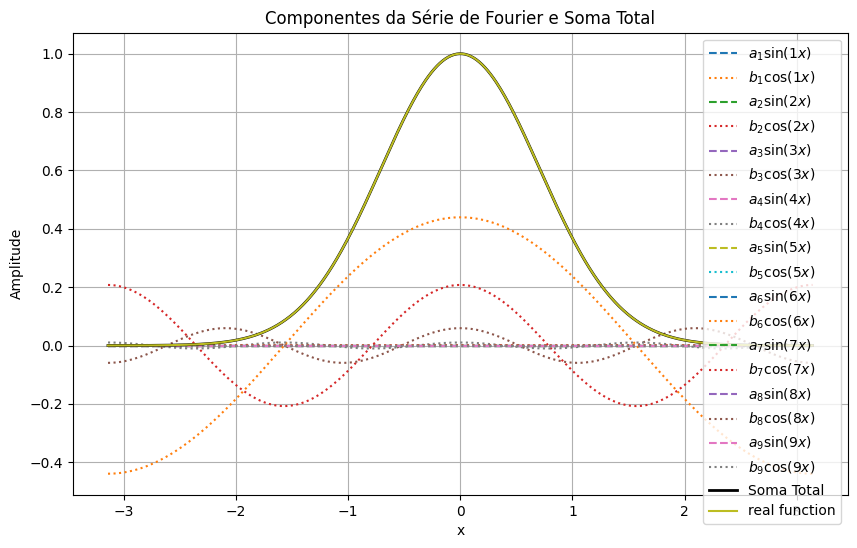

In [30]:
# Defina os coeficientes
x = np.linspace(-L,L,500)

# Inicializa a soma total
soma_total = np.zeros_like(x)
soma_total += bns[0]/2
# Configura o gráfico
plt.figure(figsize=(10, 6))

# Calcula e plota cada termo da série
for n in range(1, n_terms):
    # Calcula o termo atual
    termo_seno = ans[n] * np.sin(n * x*np.pi/L)
    termo_cosseno = bns[n] * np.cos(n * x*np.pi/L)

    # Soma o termo à soma total
    soma_total += termo_seno + termo_cosseno

    # Plota cada termo com uma cor diferente
    plt.plot(x, termo_seno, label=f'$a_{n} \sin({n}x)$', linestyle='--')
    plt.plot(x, termo_cosseno, label=f'$b_{n} \cos({n}x)$', linestyle=':')

# Plota a soma total
plt.plot(x, soma_total, label='Soma Total', color='black', linewidth=2)
plt.plot(x,f(x),label='real function')
# Configurações do gráfico
plt.xlabel("x")
plt.ylabel("Amplitude")
# plt.legend()
plt.title("Componentes da Série de Fourier e Soma Total")
plt.grid(True)
plt.legend()
plt.show()



# Week 3

Andar $\omega$ ou $\omega + 2\pi$ levam ao mesmo lugar

A maior distância entre frequências é $\pi$

Qual valor de ω≠0 faz cos(ωn) não sair do valor 0?
$2\pi$ <br>
Lembre que o n é inteiro. Logo, no caso do discreto -onde conheço o sinal-, ter frequência distante de $2pi$ são indistinguíveis.

## Transformada de Fourier no caso discreto

Exemplo: tome $f(x) =\frac{1}{2^x} \mathbb{1}_{t \in \mathbb{N}}$, a transformada é dada por:
$$∫_{-∞}^∞ f(x) e^{-i\omega t}dt =\sum_{i=0}^{\infty} (\frac{e^{-i\omega}}{2})^n = \frac{2e^{i\omega}}{-1+2e^{i\omega}}$$

Essa transformada é contínua na frequência, mesmo sendo inteiro na amostra

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


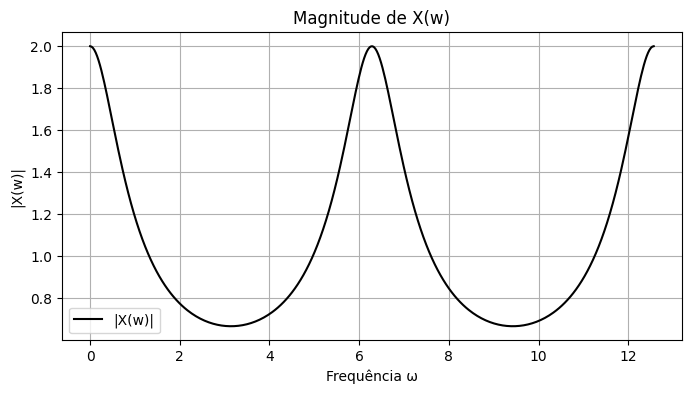

In [41]:
from sympy import symbols, I, exp, Abs, lambdify
import numpy as np
import matplotlib.pyplot as plt

w = symbols('w', real=True)
X_w = (2 * exp(I * w)) / (-1 + 2 * exp(I * w))

# Criando uma função NumPy para os valores absolutos
w_vals = np.linspace(0, 4 * np.pi, 400)
X_w_func = lambdify(w, Abs(X_w), 'numpy')
X_abs = np.array([X_w_func(val) for val in w_vals])  # Avaliação ponto a ponto

# Plotando o gráfico
plt.figure(figsize=(8, 4))
plt.plot(w_vals, X_abs, label='|X(w)|', color='black')
plt.title('Magnitude de X(w)')
plt.xlabel('Frequência ω')
plt.ylabel('|X(w)|')
plt.grid()
plt.legend()
plt.show()


Note que para frequências deslocadas de $2\pi$ o resultado é o mesmo.

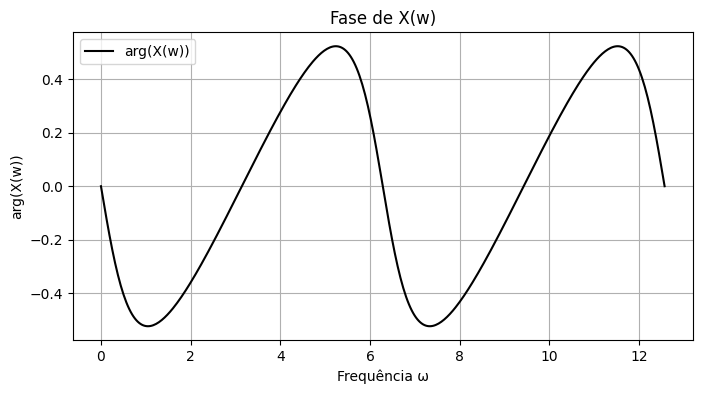

In [42]:
# Criando uma função NumPy para os argumentos (fases)
w_vals = np.linspace(0, 4 * np.pi, 400)
X_w_func = lambdify(w, arg(X_w), 'numpy')
X_phase = np.array([X_w_func(val) for val in w_vals])  # Avaliação ponto a ponto

# Plotando o gráfico
plt.figure(figsize=(8, 4))
plt.plot(w_vals, X_phase, label='arg(X(w))', color='black')
plt.title('Fase de X(w)')
plt.xlabel('Frequência ω')
plt.ylabel('arg(X(w))')
plt.grid()
plt.legend()
plt.show()

Passando esse sistema por duas operações:
```
saida[n] = entrada[n] - entrada[n-1]
saida[n] = (entrada[n] + entrada[n-1])/2
```

Para aplicar no espaço da frequência, eu faço convolução com o filtro no espaço das frequências

Question 1
No curso, vimos que frequências discretas separadas por 2π são indistinguíveis. Assim, lembrando da comparação da transformada de Fourier com uma receita, as frequência π/4 e 9π/4 correspondem ao mesmo "ingrediente", de forma que se a transformada manda usar a frequência π/4 com amplitude 1,3 e fase 0,45 para construir um determinado sinal, somos obrigados a usar a frequência 9π/4 com as mesmas amplitudes e fases. É como uma receita usar sal ou NaCl: temos que usar a mesma quantidade de ambos, já que são apenas dois nomes diferentes para o mesmo ingrediente. Só não podemos usar ambos ao mesmo tempo, usamos sal ou NaCl.

 Mas existe uma outra simetria, que se origina das seguintes relações: para qualquer ângulo a e qualquer inteiro k,

cos(−a)=cos(a).

cos(a+2πk)=cos(a).

Considere então um sinal cuja transformada de Fourier possua fase igual à frequência, ou seja, θ=ω, no intervalo 0<π<ω. Lembre-se que a maior frequência digital é π, e a transformada especifica como as frequências entre 0 e π são usadas para construir o sinal. Usando essas informações e as propriedades acima, com que fase devemos pegar a frequência 2π−1 para construir o sinal? Observe que essa frequência é maior que π.

Ans = -1

Question 2
Esse exercício é o primeiro passo no modelamento do aliasing. Considere o sinal
x[n]=cos(π/2n)+cos(3π/2n+2π/3)+cos(5π/2n+2π/3). Lembre-se que frequências discretas separadas por 2π são indistinguíveis. Na realidade, para esse exercício você vai precisar das seguintes relações: para quaisquer ângulos a e b, e qualquer inteiro n,

)
cos(−a)=cos(a).

sin(−a)=−sin(a).

cos(a+2πk)=cos(a).

cos(a+b)=cos(a)cos(b)−sin(a)sin(b).

Usando essas propriedades, é possível escrever x[n] em termos apenas da frequência π/2. Qual a amplitude do sinal resultante?

0

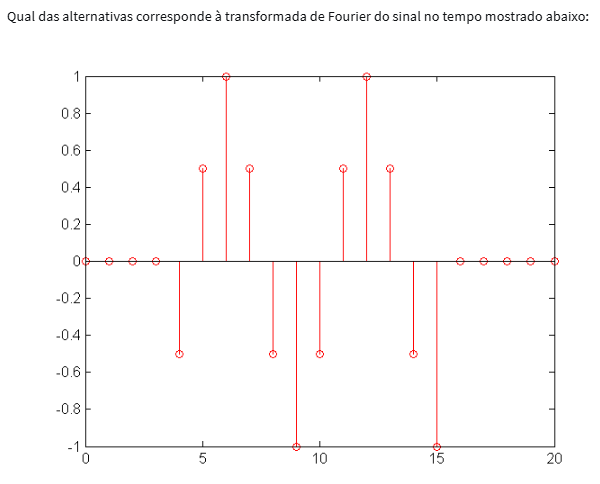

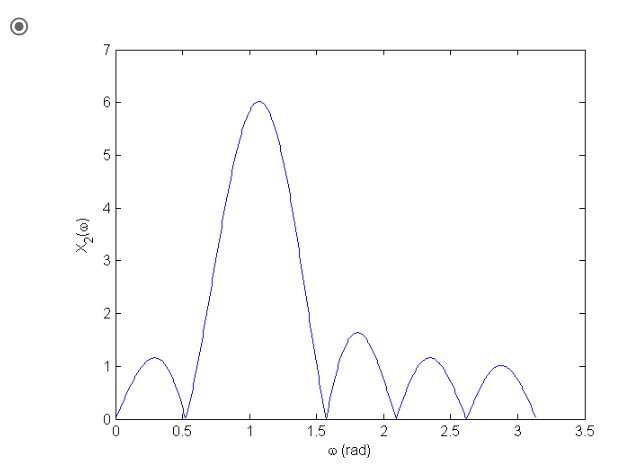

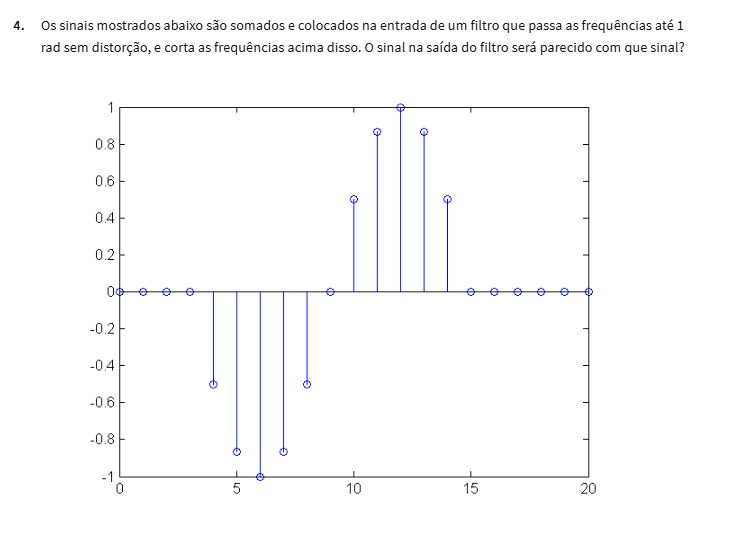

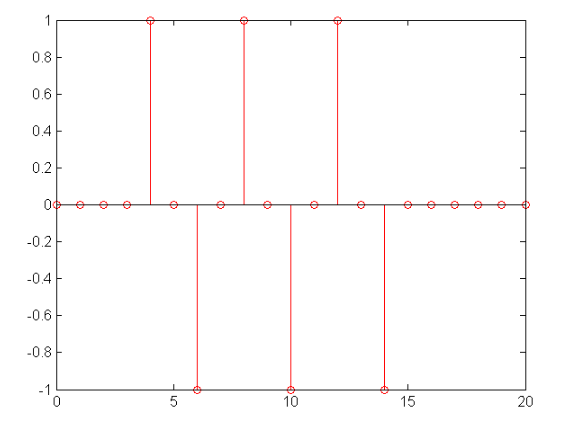

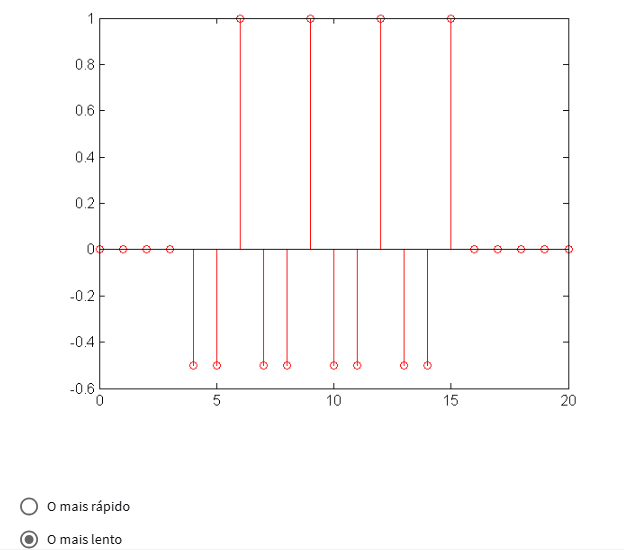

# Week 4

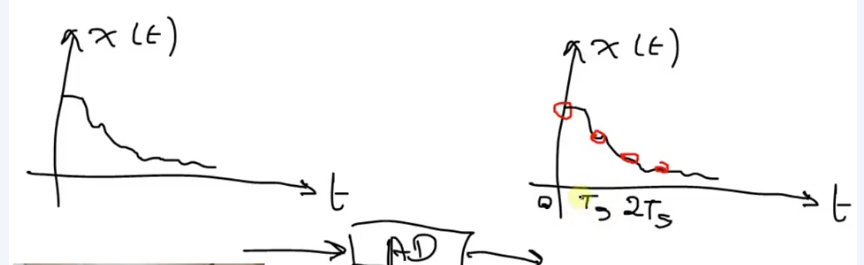

Conversor digital: pega um sinal analógico e nos tempos de amostragem joga os valores

Quando o sinal Acos(Ωt) é amostrado com período de amostragem $T_s$ , a saída é uma senóide discreta com que frequência?

Seja $t = nT_s$, $Acos(\Omega n T_s)=A cos(\omega n)$ em que $\omega = \Omega T_s$

Uma senóide é amostrada com frequência de amostragem
f =48000 amostras por segundo. O sinal digital resultante tem frequência ω=π. Qual a frequência do sinal analógico, em Hz?

$\pi = \Omega/48000  => \Omega= 48000 \pi rad/s => f = 24000Hz$

Uma senóide é amostrada com frequência de amostragem $f_s=48000$ amostras por segundo. O sinal digital resultante tem frequência ω =π/2. Qual a frequência do sinal analógico, em Hz? <br>
$\pi/2 = \Omega/48000 => \Omega = 24000\pi => f=12000Hz$

## Aliasing

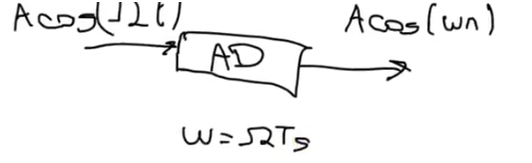

$Acos(\Omega t) = A cos(\omega n)$;<br>
$\Omega$ analógico e $\omega$ digital<br>
$t = n T_s$<br>
$\Omega n T_s = \omega n$


Quando eu amostro uma senóide analógica de frequência
f a uma frequência de amostragem  $f_s$ , eu obtenho uma senóide digital com um determinado ω. Que frequência analógica leva à frequência digital ω+2π?<br>
Observe que freq digital = $2\pi f_1/f_s = 2\pi (f + f_s)/f_s = \omega +2\pi  $

$\omega + 2\pi = \Omega_2 T_s$

$\frac{\omega}{T_s} + \frac{2\pi}{T_s} = 2\pi(f +f_s) $

Frequências analógicas que diferem de $f_s$ são indistinguíveis na amostragem - dar uma volta inteira no mesmo lugar, baseada na taxa de amostragem.

A maior frequência digital é $\pi$, logo a maior frequência que consigo representar com amostragem de 8192Hz é:
$\pi = 2\pi (f/f_s) => f = f_s/2$

Frequência digital = $\omega$ = $\Omega T_s$<br>
$\Omega$ é freq. analógica<br>
$\Omega = \pi/T_s$<br>
f=$\Omega/(2\pi)$

Quando eu amostro um sinal a
$f_s=8192/5$ amostras por segundo, para onde vai a frequência analógica 3511 Hz? Ela vai aparecer em qual valor de ω entre 0 e π? Ela vai se misturar a quais outras frequências analógicas?

In [45]:
f_digital = 2*3511*np.pi/(8192/5) # em teoria, mas ela é indistinguível de
print(f_digital)
print(f_digital - 2*np.pi)
print(f_digital - 4*np.pi)


13.464516365666213
7.181331058486627
0.898145751307041
1638.4


Uma senóide analógica com frequência 886 Hz é amostrada a
$f_s=8192/5$ amostras por segundo. Essa frequência vai aparecer em qual frequência digital entre
0 e π? Dê sua resposta com 3 casas depois da vírgula.

Note que assumimos que a função que dita o comportamento da senóide é cos(x), logo é uma função par. cos(x) = cos(-x)

In [47]:
import numpy as np
f_analogic = 886
f_s = 8192/5
print("max digital freq:",f_s/2)

# 2*pi*886  = \Omega
# w = 2pi*886/f_s$
print(np.round((1-f_analogic/f_s)*2*np.pi,3))



max digital freq: 819.2
2.885


Lembre-se de quais são as frequências que se misturam:
$f+f_s, f+2f_s,f_s-f, 2f_s −f$, etc. Alguma dessas frequências está entre
0 e $f_s /2$ e, portanto, será mapeada em uma frequência digital entre
0 e π

## Filtro anti-aliasing

Considere um sinal de áudio, para o qual a maior frequência de interesse é 20kHz, que será amostrado a
$f_s=44100$ amostras por segundo. O filtro anti-aliasing não pode causar distorções na faixa de interesse, e deve ser projetado com faixa de passagem até 20kHz. Mas ele não pode deixar passar as frequências que causam aliasing na faixa de interesse. Lembrando que quanto maior a faixa de transição entre a faixa de passagem e a de rejeição, mais simples é o filtro, em qual frequência deve começar a faixa de rejeição do filtro?

20 kHz porque já estão fora da faixa de interesse

Perfeito. A frequência f=24100 se mistura com a frequência $f_s−f=20 kHz$, que está no limite da faixa de interesse. Já uma frequência por exemplo de
f=24200 se mistura com a frequência
$f_s−f=19800 Hz$, que está dentro da faixa de interesse.<br>
Portanto, essa frequência não pode aparecer na saída do filtro. Finalmente, a frequência f=24000 se mistura com a frequência
$f_s−f=20100 Hz$, fora da faixa de interesse.<br>Seguindo esse raciocínio, vemos que a faixa de rejeição do filtro deve começar em 24100 Hz.

Se eu amostrar, com 48.000 amostras por segundo um sinal com um apito de cachorro, com frequência 40 kHz, o apito do cachorro vai se misturar, por aliasing, com qual frequência na faixa de interesse?
<br>
8kHz

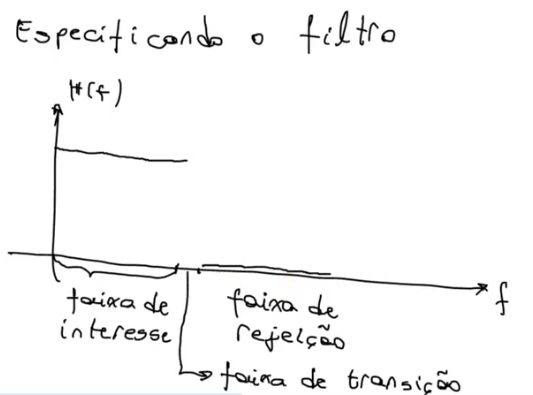

Quanto mais distante a faixa de transição, mais simples é o filtro e menor o gasto

Question 1
Uma senóide é amostrada com frequência de amostagem $f_s=48000$ amostras por segundo. O sinal digital resultante tem frequência ω=2π. Qual a frequência do sinal analógico, em Hz?
48000 Hz

Question 2
Uma senóide analógica com frequência 1169 Hz é amostrada a
$f_s=8192/5$ amostras por segundo. Essa frequência vai aparecer em qual frequência digital entre 0 e π? Dê sua resposta com 1 casa depois da vírgula

In [49]:
#aliasing está em 1169 - k*8192/5 e k*8192/5 e 1169, a frequência deve estar entre 0 e 819.2
freq_amost = 8192/5
freq_analogic = 1169
for k in range(1,3):
  print(k)
  print(freq_amost*k- freq_analogic)
  print(freq_analogic - freq_amost*k)


1
469.4000000000001
-469.4000000000001
2
2107.8
-2107.8


In [51]:
# note que 469.4 < 819.2,
np.pi*2*(freq_amost*1-freq_analogic)/freq_amost

1.8001264545838003

Question 3
O objetivo desse exercício é mostrar que a forma como frequências se combinam devida a aliasing depende de suas amplitudes e fases. Assim, seja
x(t)=cos(2π10t)+cos(2π30t+2π/3)+cos(2π50t+2π/3) um sinal analógico que será amostrado a $f_s =40$ amostras por segundo. por aliasing, essas frequências todas acabam se combinando em uma única frequência digital: ω=π/2. Qual será a amplitude correspondente a essa frequência? <br>
0

Considere um sinal analógico cuja transformada de Fourier possui amplitude
A=f para frequências entre 0 e 100 Hz, e amplitudes nulas para as outras frequências. As fases são sempre nulas. Esse sinal será amostrado a uma frequência de amostragem $f_s =40$ amostras por segundo. O sinal digital resultante também possui uma transformada, em que cada frequência depende da frequência analógica correspondente e das frequências com aliasing. Determine a amplitude da transformada de Fourier do sinal discreto na frequência π/2.



In [55]:
# np.pi/2 = Omega/40 = 2*pi*f/40
f_analogico = 10
print(f_analogico)
soma = 10
evento = 0
while(soma < 100):
  print(f'A frequencia {soma} não sofre aliasing, logo seu valor de frequência é a Amplitude')
  print(soma)
  evento += soma
  soma += 40
print('Somando tudo a Amplitude será:',evento)


10
A frequencia 10 não sofre aliasing, logo seu valor de frequência é a Amplitude
10
A frequencia 50 não sofre aliasing, logo seu valor de frequência é a Amplitude
50
A frequencia 90 não sofre aliasing, logo seu valor de frequência é a Amplitude
90
Somando tudo: 150


Question 5
Muitos sinais de áudio (os desse curso, por exemplo), são amostrados a 48000 amostras por segundo. Isso certamente não altera a faixa de passagem do filtro anti-aliasing, pois a faixa de interesse continua sendo as frequências até 20kHz, que é a faixa audível para os humanos. Mas essa nova taxa de amostragem muda as frequências que vão causar aliasing na faixa de interesse, e, portanto, devemos mudar a faixa de rejeição do filtro. Lembre-se que o filtro não pode deixar passar as frequências que causam aliasing na faixa de interesse, e que, quanto maior a faixa de transição entre a faixa de passagem e a de rejeição, mais simples é o filtro. Assim, para
$f_s =48000 Hz$, , em qual frequência deve começar a faixa de rejeição do filtro?

48000 - 20000 = 28kHz

Perfeito. A frequência
f
=
28
f=28 kHz se mistura com a frequência
f
s
−
f
=
20
f
s
​
 −f=20 kHz, que está no limite da faixa de interesse. Já uma frequência por exemplo de
f
=
28.2
f=28.2 kHz se mistura com a frequência
f
s
−
f
=
19800
f
s
​
 −f=19800 Hz, que está dentro da faixa de interesse. Portanto, essa frequência não pode aparecer na saída do filtro. Finalmente, a frequência
f
=
27.9
f=27.9 kHz se mistura com a frequência
f
s
−
f
=
20100
f
s
​
 −f=20100 Hz, fora da faixa de interesse. Seguindo esse raciocínio, vemos que a faixa de rejeição do filtro deve começar em 28 kHz.

# Week 5

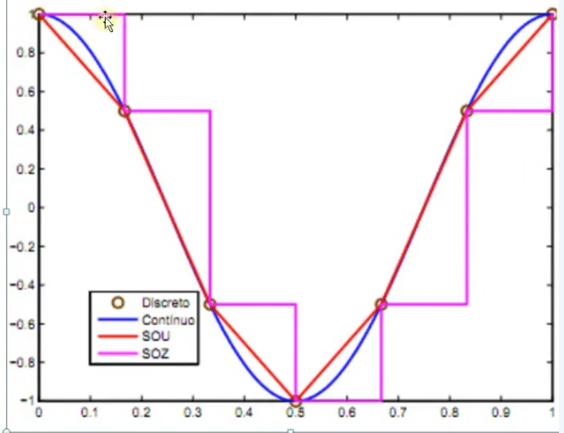

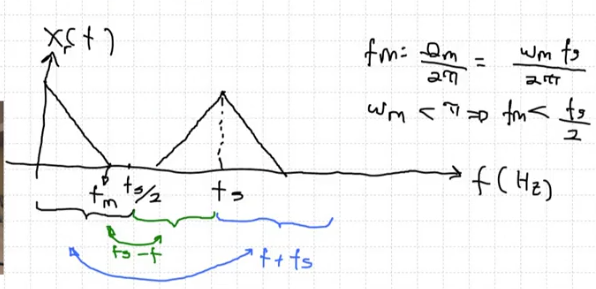

Eu amostro um sinal de áudio com 8192 amostras por segundo. Ao tocá-lo, eu me confundo e digo que a taxa de amostragem foi 4096. O som que será tocado nesse caso será, em comparação ao som original,


Mais grave?


Mais agudo?


Igual?

Perfeito. Tem duas formas de ver isso. 1) Pegue a frequência digital π. Na amostragem, ela corresponde à frequência analógica $f_s/2=4096$. Na reconstrução, ela será novamente levada a $f_s/2$. Mas agora $f_s$
​vale 4096 Hz, então $f_s/2$ vale 2048 Hz. Assim, a frequência 4096 será tocada como 2048 Hz, uma frequência mais grave. 2) Podemos também pensar no que ocorre com um grupo de 8192 amostras. Isso corresponde a um segundo do sinal original. Mas ao ser tocado a 4096 amostras por segundo, esse grupo de amostras levará dois segundos para ser tocado. Suas variações ficarão assim mais lentas, suas frequências diminuirão, e ele ficará mais grave.

 Vamos pensar num bloco de 8 mil amostras de Y. Eu gostaria que isso fosse tocado segundo. Mas quando eu falei para o matlab que a frequência de amostragem foi na realidade quatro mil, ele vai tocar quatro mil amostras segundo. Então todo aquele segundo que era para ele ter tocado originalmente ele vai passar a tocar agora num período de 2 segundos, num intervalo de 2 segundos. Então alguma coisa que tinha uma determinada variação segundo vai passar a ter a mesma variação só que 2 segundos, ela vai passar a variar mais lentamente, ela vai diminuir a frequência, vai ficar mais grave, as variações vão passar a ser mais lentas. Da mesma forma, se eu trocar com o dobro da frequência de amostragem, ele vai ficar mais agudo.

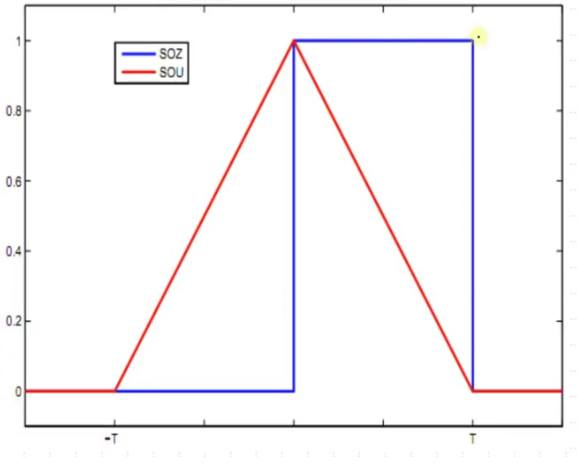

SOZ = Simulador de Ordem Zero <br>
SOU = Simulador de Ordem Um <br>
A transformada $X_r(\Omega) = X_r(\omega f_s) P(\omega)$<br>
A transformada do sinal reconstruído para analógico é a transformada do digital, desfeito a regra de 3 vezes o pulso.

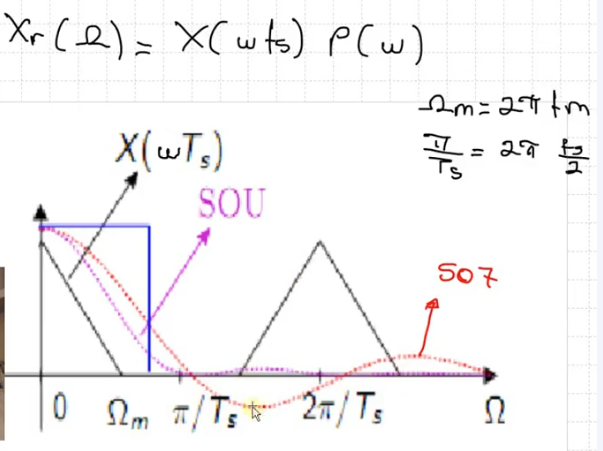

Esse modelo vai adicionar as altas frequências e tenho ganho de quase 1 em baixas, mas as próximos de $\Omega_m$ são

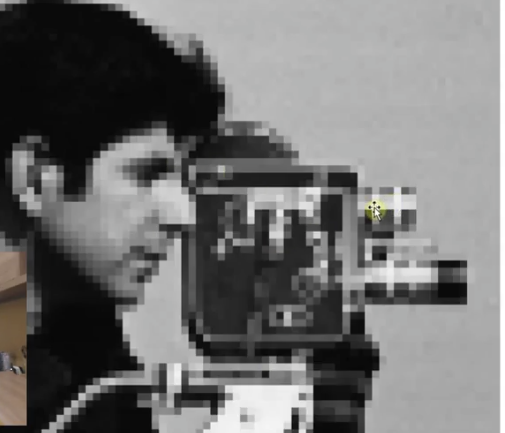

Afaste da tela, o olho funciona como um filtro passa-baixa.
 O que chega no nosso olho, na realidade, é uma região de luz que está num determinado ângulo, bem pequenininho, mas quanto mais a gente se afasta, quer dizer, se eu olhar bem de pertinho aqui, esse ângulo pega pouca coisa, se eu tiver longe, esse ângulo pega muita coisa. Então, o que chega numa célula do meu olho é uma média de tudo que está dentro desse ângulo. Uma média é filtro passa baixas e é por isso que quanto mais a gente se afasta, o que atinge uma célula do nosso olho acaba sendo uma região cada vez maior, a gente nota a média dessa região e isso é filtro passa baixas.

Se um sinal x(t) é amostrado por um ADC ideal, filtrado por um passa-baixas discreto ideal que preserva frequências até π/4 e cancela as maiores, e reconstruído por um DAC ideal, para quais frequências o sinal reconstruído será igual ao original? <br>
De 0 a $f_s/8$

Question 2
Se você pudesse especificar um pulso para o DAC a partir de sua transformada de Fourier, que pulso você escolheria para evitar as distorções estudadas para o DAC?<br>
Um pulso com 1 na frequência 0 a $f_s/2$ e 0 para maiores


Question 3
Considere um sinal x(t) cuja maior frequência é 10 kHz, que é amostrado a 100 kHz (100 mil amostras por segundo.)  Para reconstrução, usamos um DAC não ideal, que deixa passar um pouco das imagens (altas frequências). Desejamos melhorar as imagens e, para isso, vamos colocar um filtro passa baixas na saída do DAC. Não vamos nos preocupar com as distorções que o DAC introduz dentro da faixa de interesse. Por isso, vamos usar um filtro que não faz nada com o sinal na faixa de interesse. Em outras palavras, a faixa de passagem do filtro vai até 10kHz. E a faixa de rejeição, onde começa? Lembre-se que quanto maior a distância entre a faixa de passagem e a faixa de distorção, mais simples e barato é o filtro.<br>

Frequência máxima para o digital é $f_s/2 = 50 kHz$, e a maior frequência é 10kHz. Logo, as frequências de aliasing são 100kHz - k*10kHz. Note que k = 9 gera no intervalo até 10kHz, logo uma frequência boa de rejeição é 90kHz.


Um sinal senoidal de frequência 10Hz é amostrado a uma frequência de amostragem de $f_s =3Hz$. Em seguida, ele é reconstruído usando um conversor digital-analógico ideal, que não deixa aparecer as imagens, ou seja, cuja saída só contém frequências entre 0 e $f_s /2$. Determine qual será a frequência do sinal reconstruído.

A frequência é no máximo 1.5Hz; as de aliasing são 3k - 10 e 10 -3k, logo, 1Hz é a única possível.

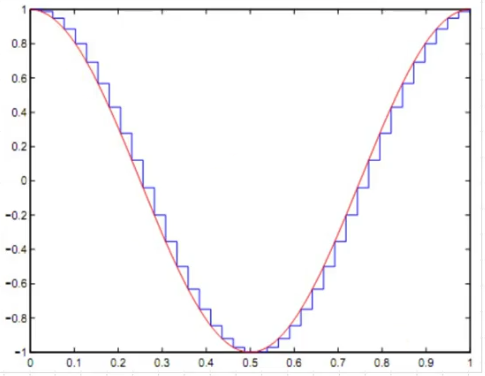

Aumentar a frequência na reconstrução também é importante para melhorar o sinal.

E quais são as duas vantagens que eu consigo ao aumentar a taxa de amostragem? Menor distorção dentro da faixa e as minhas altas frequências aparecendo cada vez mais longe das minhas frequências de interesse, o que facilita cada vez mais o trabalho do meu filtro passa baixas. Então, essa são as grandes vantagens de aumentar a taxa de amostragem. A gente consegue uma reconstrução mais simples, com melhor qualidade, mas, claro, com maior custo. É interessante notar que essa mudança de taxa de amostragem, eu posso obter digitalmente. Eu posso pegar o meu sinal, amostrar a 44100 normal, do jeito que eu faria normalmente e depois esse x(n), eu gero mais amostras dele no mundo digital, sem mudar o meu conversor analógico-digital, pelo menos. O conversor digital para analógico é inevitável. Essa parte de mudança de taxa de amostragem no mundo digital é uma parte importantíssima de processamento digital de sinais.